In [13]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal
from numpy import random
from pytransit import QuadraticModel
from transitleastsquares import transitleastsquares

import batman
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 5)


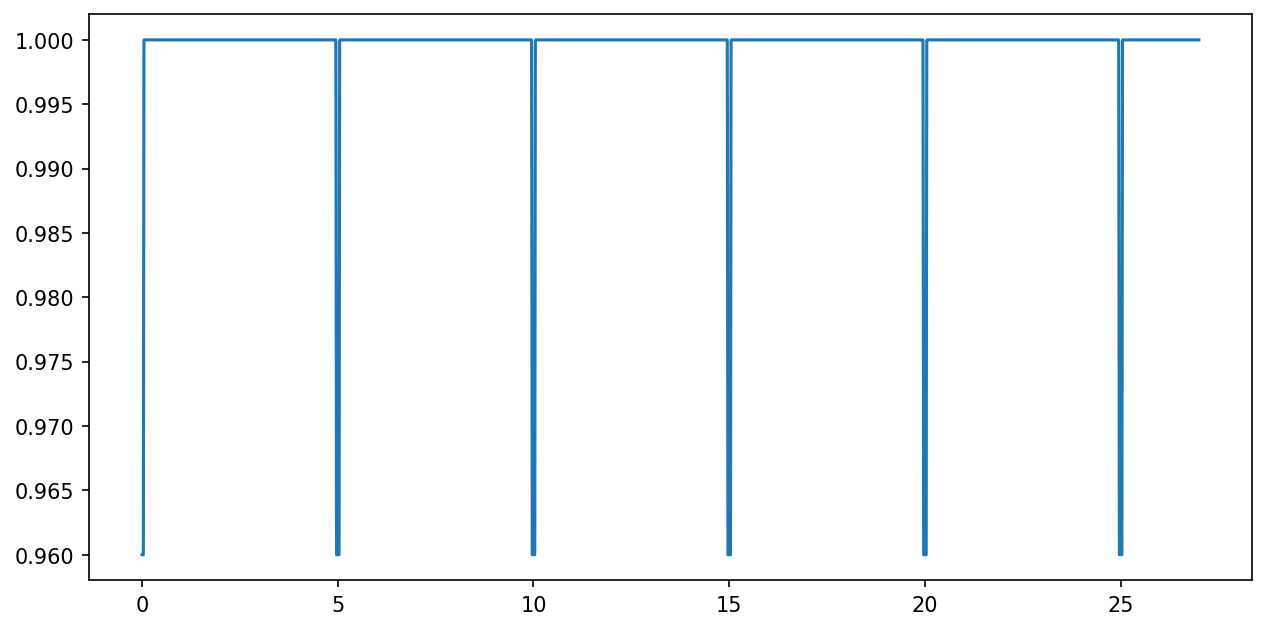

In [14]:
time = np.linspace(0,27,19441)

def model(period,rp_over_rstar,a_over_rstar,inc,ecc,omega):
    """
    Function for computing transit models for the set of 8 free paramters
    x - time array
    """
    tm = QuadraticModel()
    tm.set_data(time)
    i=inc/180.0*np.pi
    w=omega/180.0*np.pi
    lightcurve=tm.evaluate(k=rp_over_rstar, ldc=[0.0,0.0], t0=0.0, p=period, a=a_over_rstar, i=i,e=ecc,w=w)
    return lightcurve

#lc=model(5.0,.2,19.53338,90.,0.,0.) #for a star with half radius and half mass of sun

#fig = plt.figure()
#plt.plot(time, lc)
#plt.show()

(4.0, 6.0)

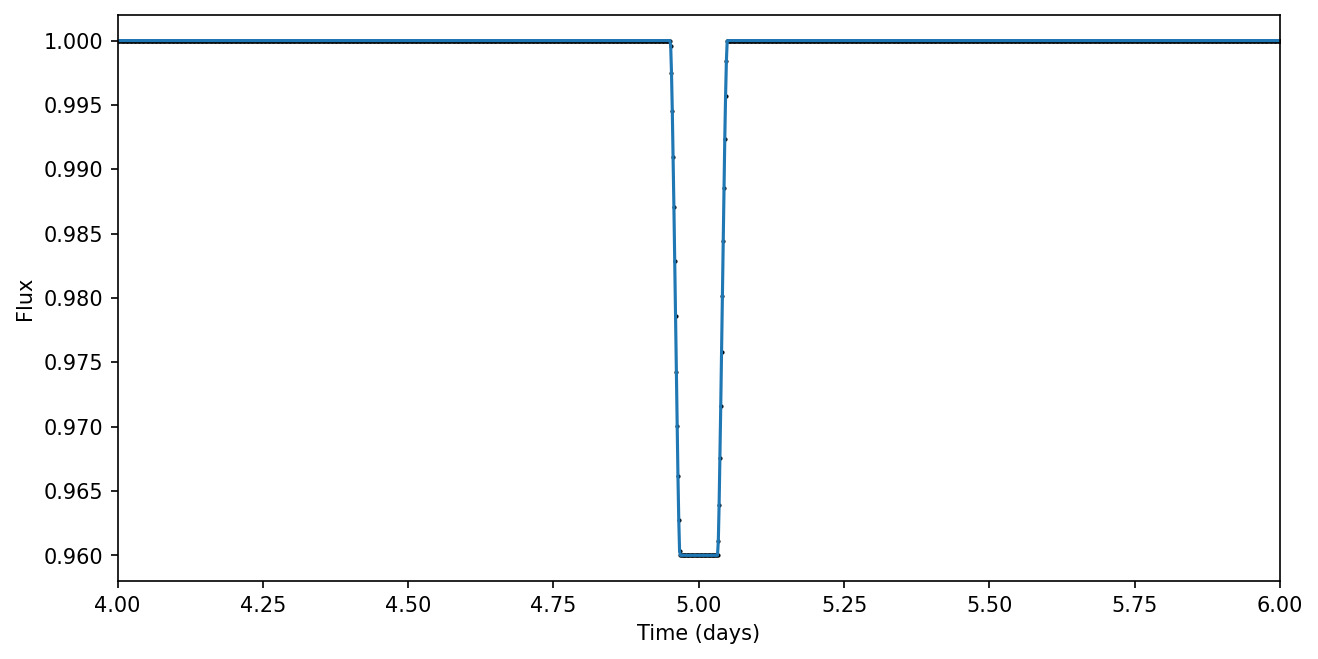

In [20]:
import numpy
import batman
import matplotlib.pyplot as plt
from matplotlib import rcParams; rcParams["figure.dpi"] = 150

numpy.random.seed(seed=0)  # reproducibility 

# Create test data
time_start = 0
data_duration = 27
samples_per_day = 720
samples = int(data_duration * samples_per_day)
time = numpy.linspace(time_start, time_start + data_duration, samples)

# Use batman to create transits
ma = batman.TransitParams()
ma.t0 = time_start  # time of inferior conjunction; first transit is X days after start
ma.per = 5  # orbital period
ma.rp = .2  # 6371 planet radius (in units of stellar radii)
ma.a = 19.533  # semi-major axis (in units of stellar radii)
ma.inc = 90  # orbital inclination (in degrees)
ma.ecc = 0.  # eccentricity
ma.w = 0.  # longitude of periastron (in degrees)
ma.u = [0.0, 0.0]  # limb darkening coefficients
ma.limb_dark = "quadratic"  # limb darkening model
m = batman.TransitModel(ma, time)  # initializes model
synthetic_signal = m.light_curve(ma)  # calculates light curve

# Create noise and merge with flux
ppm = 0  # Noise level in parts per million #50000 is SNR of 8 because signal is .4 and noise is .05 (50,000/1,000,000=.05)
noise = numpy.random.normal(0, 10**-6 * ppm, int(samples))
flux = synthetic_signal + noise

# Plot raw data
plt.figure()
ax = plt.gca()
ax.scatter(time, flux, color='black', s=1)
ax.set_ylabel("Flux")
ax.set_xlabel("Time (days)")

lc=model(5.0,.2,19.53338,90.,0.,0.) #for a star with half radius and half mass of sun

plt.plot(time, lc)
plt.xlim([4, 6])


In [6]:
model = transitleastsquares(time, flux)
results = model.power()

/Users/danayaptangco/opt/anaconda3/lib/python3.8/site-packages/transitleastsquares/transit.py:157: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  lc_arr = numpy.array(lc_arr)
  0%|          | 0/2458 periods | 00:00<?

Transit Least Squares TLS 1.0.26 (20 March 2021)
Creating model cache for 38 durations
Searching 19439 data points, 2458 periods from 0.602 to 13.499 days
Using all 4 CPU threads


100%|██████████| 2458/2458 periods | 03:20<00:00


5.005200059609812


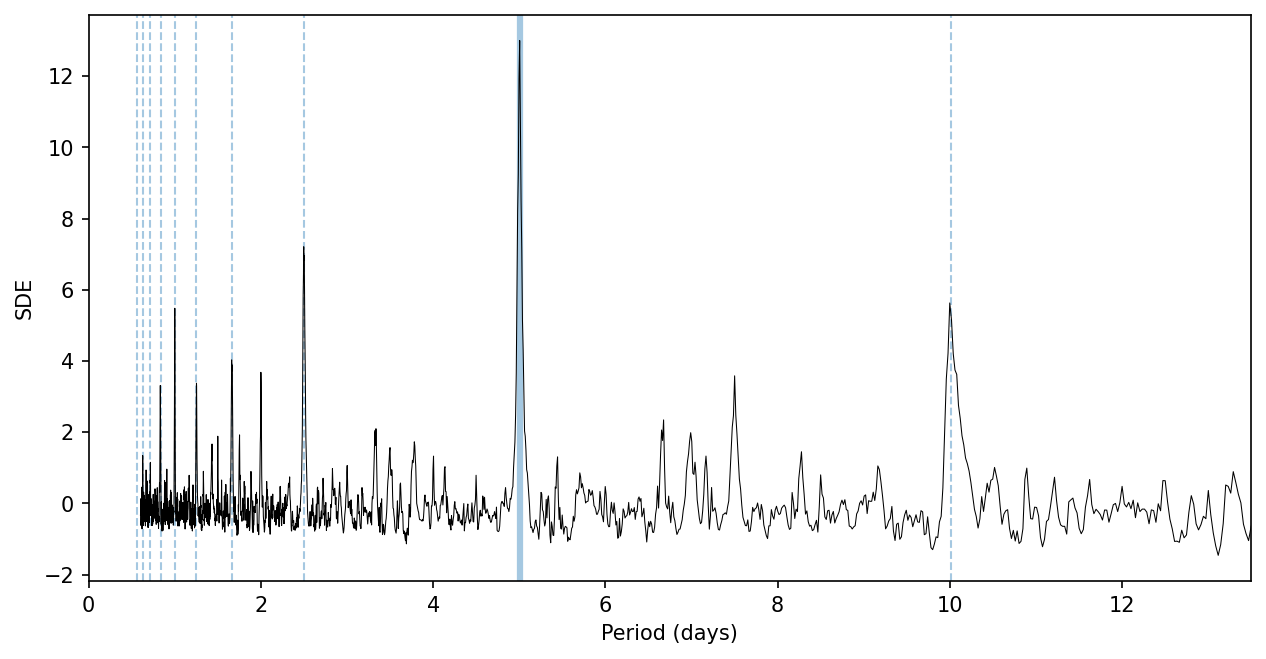

In [9]:
plt.figure()
ax = plt.gca()
ax.axvline(results.period, alpha=0.4, lw=3)
plt.xlim(numpy.min(results.periods), numpy.max(results.periods))
for n in range(2, 10):
    ax.axvline(n*results.period, alpha=0.4, lw=1, linestyle="dashed")
    ax.axvline(results.period / n, alpha=0.4, lw=1, linestyle="dashed")
plt.ylabel(r'SDE')
plt.xlabel('Period (days)')
plt.plot(results.periods, results.power, color='black', lw=0.5)
plt.xlim(0, max(results.periods))

print(results.period)


#use the index to find x value at max y value

# plt.figure()
# plt.plot(results.model_folded_phase, results.model_folded_model, color='red')
# plt.scatter(results.folded_phase, results.folded_y, color='blue', s=10, alpha=0.5, zorder=2)
# plt.xlim(0.48, 0.52)
# plt.ticklabel_format(useOffset=False)
# plt.xlabel('Phase')
# plt.ylabel('Relative flux');